<a href="https://colab.research.google.com/github/leburik-1/machine_learning/blob/main/TSNE_to_visualize_z_iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 5)
pd.set_option('display.width', None)
pd.set_option('display.precision', 2)

sns.set(font_scale=1.1)
sns.set_style('whitegrid')

iris = load_iris()
iris.data.shape

(150, 4)

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [13]:
X = iris.data
y = iris.target

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [22]:
iris_df['species'] = [iris.target_names[i] for i in iris.target]

In [8]:
iris_df.head()
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

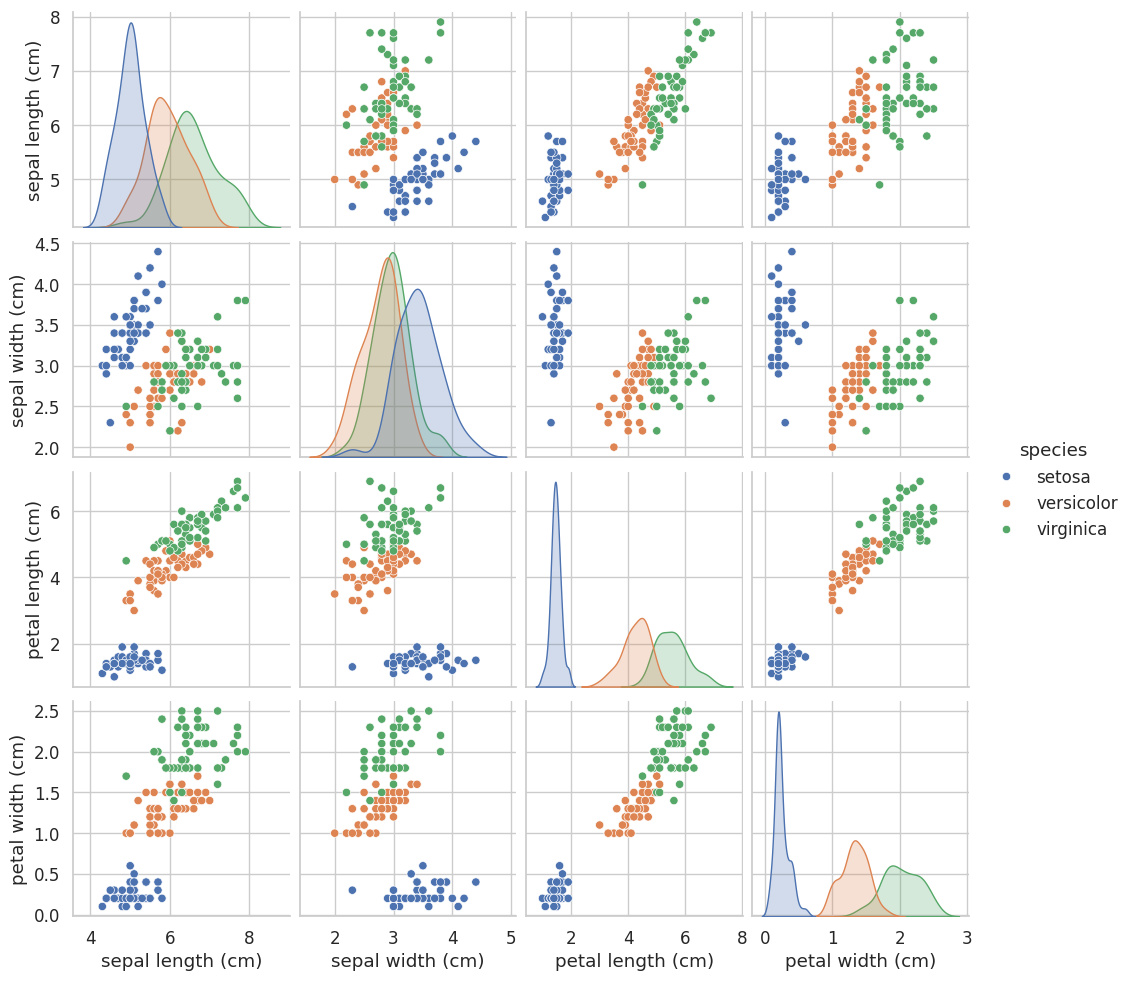

In [9]:
grid = sns.pairplot(data=iris_df, vars=iris_df.columns[0:4], hue='species')

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(iris.data)

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Create a new DataFrame for t-SNE results
tsne_df = pd.DataFrame(data=X_tsne, columns=['Dimension 1', 'Dimension 2'])
# Reattach the species column
tsne_df['species'] = iris_df['species']  # Fixing the missing species issue

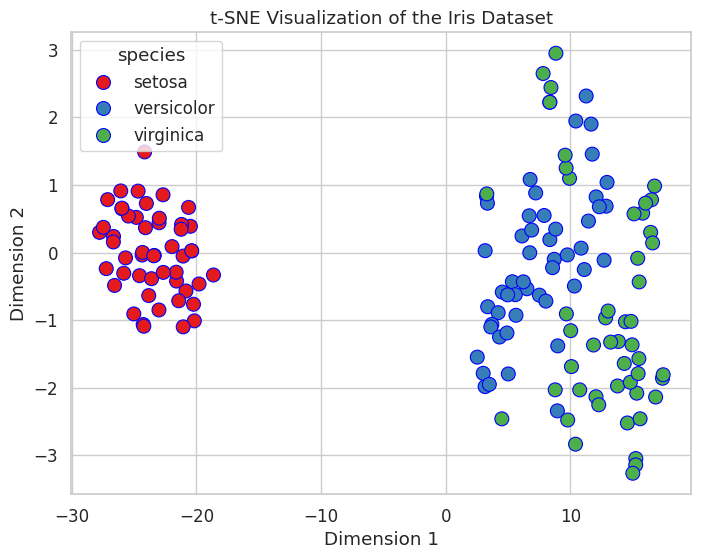

In [23]:
# # Create a DataFrame for the 2D representation
# tsne_df = pd.DataFrame(data=X_tsne, columns=['Dimension 1', 'Dimension 2'])
# tsne_df['Species'] = iris.target_names[y]

plt.figure(figsize=(8, 6))

sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='species', data=tsne_df, palette='Set1', s=100, edgecolor='blue')
plt.title('t-SNE Visualization of the Iris Dataset')
plt.show()